# Building an Recommendation Engine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('final_recommendation_data.csv')

In [6]:
df.head()

,Name,Rainbow,Ad_Nauseam,Affinity,Aura_Hexproof,BUG,Bant,Birthing_Pod,Bloom_Titan,Blue_Moon,...,Tokens,Twin_Exarch,UB_Delver,UR_Aggro,UR_Storm,UW_Control,UWx_Midrange,UrzaTron,Valakut,Zoo
0,first,16,8,174,33,3,5,201,19,10,...,18,156,8,54,54,37,102,105,2,34
1,second,12,9,153,22,1,3,173,21,3,...,19,163,9,49,51,56,86,74,5,40
2,third,11,15,177,28,3,5,159,23,1,...,14,154,6,48,51,41,86,108,3,36
3,forth,5,11,93,13,1,1,117,9,2,...,5,96,3,33,32,25,45,72,2,14
4,fifth,4,17,155,18,4,15,146,22,10,...,15,149,8,43,39,41,89,66,1,36


In [7]:
def plot_items(df, item1, item2):
    fig, ax = plt.subplots(1, 1)
    df = df[['Name', item1, item2]].dropna()
    tot_rows = len(df)
    x_values = df[item1].values
    y_values = df[item2].values
    ax.scatter(x_values, y_values)
    ax.set_xlabel(item1)
    ax.set_ylabel(item2)
    for name, x, y in zip(df['Name'], x_values, y_values):
        ax.annotate(name, xy=(x,y))

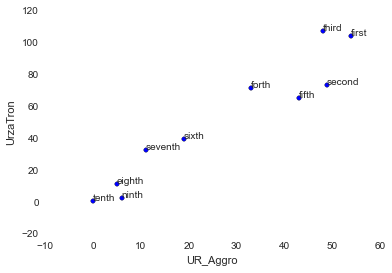

In [8]:
plot_items(df, 'UR_Aggro', 'UrzaTron')

In [9]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

In [10]:
ratings_df = pd.melt(df, id_vars=['Name'], var_name='archetype')

In [11]:
ratings_df

,Name,archetype,value
0,first,Rainbow,16
1,second,Rainbow,12
2,third,Rainbow,11
3,forth,Rainbow,5
4,fifth,Rainbow,4
5,sixth,Rainbow,4
6,seventh,Rainbow,3
7,eighth,Rainbow,3
8,ninth,Rainbow,1
9,tenth,Rainbow,0


In [13]:
df2 = ratings_df.dropna()
affinity_users = df2[df2.archetype == 'Affinity']
urzatron_users = df2[df2.archetype == 'UrzaTron']

In [14]:
common_users = set(affinity_users.Name).intersection(urzatron_users.Name)
affinity_ratings = df2[df2.Name.isin(common_users) & (df2.archetype == 'Affinity')].value
urzatron_ratings = df2[df2.Name.isin(common_users) & (df2.archetype == 'UrzaTron')].value

In [15]:
cosine_similarity(urzatron_ratings, affinity_ratings)

array([[ 0.98077739]])

In [16]:
def calculate_similarity(df, item1, item2, sim_func):
    df = df.dropna()
    item1_users = df[df['archetype'] == item1].Name.unique()
    item2_users = df[df['archetype'] == item2].Name.unique()
    common_users = set(item1_users).intersection(item2_users)
    user_mask = (df['Name'].isin(common_users))
    item1_mask = (df['archetype'] == item1)
    item2_mask = (df['archetype'] == item2)
    sim_value = sim_func(df[user_mask & item1_mask].value, df[user_mask & item2_mask].value)
    return sim_value[0][0]

In [17]:
calculate_similarity(ratings_df, 'Birthing_Pod', 'Twin_Exarch', cosine_similarity)

0.99349410417189543

In [18]:
def recommended_place(ratings_df, myshop):
    sim_items = []
    for shop in ratings_df.archetype.unique():
        sim_value = calculate_similarity(ratings_df, myshop, shop, cosine_similarity)
        sim_items.append((shop, sim_value))
    return sim_items

In [21]:
sim_ratings = recommended_place(ratings_df, 'Jund')
sim_ratings.sort(key=lambda x: x[1], reverse=True)
sim_ratings

[('Jund', 0.99999999999999978),
 ('Affinity', 0.9976600366611249),
 ('UWx_Midrange', 0.99515258112313232),
 ('UR_Aggro', 0.99352892914519431),
 ('Twin_Exarch', 0.99341377369978368),
 ('Junk', 0.99165331800809986),
 ('Birthing_Pod', 0.99150821780666487),
 ('Merfolk', 0.99122645772167839),
 ('Other_Control', 0.99080033040467519),
 ('Zoo', 0.98821861377320563),
 ('UR_Storm', 0.98799734075736023),
 ('Scapeshift', 0.98667275169383151),
 ('Aura_Hexproof', 0.98606589292357949),
 ('Red_Deck_Wins', 0.98373912501636995),
 ('Hatebear', 0.98306093309110154),
 ('Martyr_Life', 0.98273826717510415),
 ('Tokens', 0.9822267956089521),
 ('Living_End', 0.98140620682207969),
 ('Infect', 0.97932746193802067),
 ('Bloom_Titan', 0.97874725736978851),
 ('UrzaTron', 0.97697419960664511),
 ('Gift_Control', 0.97523170752390997),
 ('UW_Control', 0.97487575051288111),
 ('UB_Delver', 0.97477859219132412),
 ('Faeries', 0.97339161008869945),
 ('Other_Aggro', 0.96895174412553531),
 ('The_Rock', 0.96770713426216415),
 ('